In [2]:
#Store data and labels in the list 
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()


In [3]:
cur_path

'D:\\Traffic_Sign_Recognition'

In [4]:
#Preprocessing the data
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
#Converting list into numpy array
data = np.array(data)
labels = np.array(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 65s 66ms/step - loss: 2.8924 - accuracy: 0.2562 - val_loss: 1.0401 - val_accuracy: 0.7316
Epoch 2/20
981/981 [==============================] - 69s 70ms/step - loss: 1.0059 - accuracy: 0.6967 - val_loss: 0.3989 - val_accuracy: 0.8967
Epoch 3/20
981/981 [==============================] - 62s 63ms/step - loss: 0.6127 - accuracy: 0.8154 - val_loss: 0.2982 - val_accuracy: 0.9260
Epoch 4/20
981/981 [==============================] - 62s 63ms/step - loss: 0.4569 - accuracy: 0.8607 - val_loss: 0.2449 - val_accuracy: 0.9345
Epoch 5/20
981/981 [==============================] - 61s 62ms/step - loss: 0.3760 - accuracy: 0.8901 - val_loss: 0.1296 - val_accuracy: 0.9642
Epoch 6/20
981/981 [==============================] - 59s 60ms/step - loss: 0.3138 - accuracy: 0.9107 - val_loss: 0.1350 - val_accuracy: 0.9573
Epoch 7/20
981/981 [==============================] - 58s 59ms/step - loss: 0.2982 - accuracy: 0.9166 - val_loss: 0.0815 - val_accuracy:

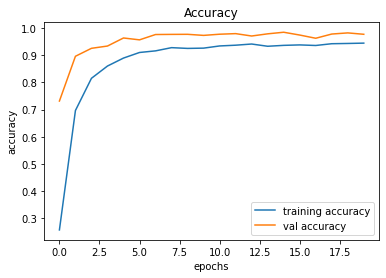

In [14]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

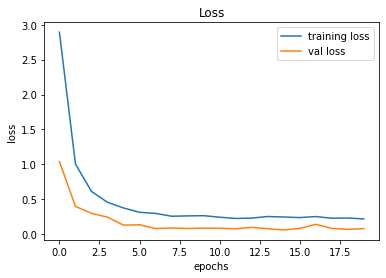

In [15]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
#Testing on Test data
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [17]:
X_test, label = testing('Test.csv')

In [63]:
Y_pred = model.predict(X_test)
Y_pred


array([[8.18848664e-24, 3.84339252e-15, 8.16221659e-19, ...,
        1.83543358e-15, 6.51870042e-24, 1.30782839e-22],
       [1.09997939e-06, 9.99989986e-01, 9.30543476e-10, ...,
        5.74500351e-15, 9.83118192e-28, 6.56015113e-22],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.97819427e-06, 1.25127017e-01, 6.65519714e-01, ...,
        1.15726993e-03, 2.65579368e-03, 1.69204504e-05],
       [8.80875619e-16, 2.19903526e-08, 1.00827915e-08, ...,
        1.48135160e-09, 4.77386999e-20, 3.66381578e-12],
       [4.35090609e-27, 3.03786345e-19, 7.92945740e-20, ...,
        4.65498378e-20, 2.63459550e-25, 2.29107457e-16]], dtype=float32)

In [19]:
model.save("./training/TSR.h5")

In [20]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [21]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

[[4.9958560e-29 5.2774630e-13 3.4813520e-16 9.1497060e-16 4.8688116e-18
  1.6385888e-15 1.4276108e-16 6.3664606e-15 1.7058291e-20 7.8776869e-21
  5.8559611e-22 3.5431174e-15 1.0000000e+00 2.1706782e-15 5.8132009e-16
  2.3438207e-10 5.5818800e-20 7.7606267e-18 1.5245791e-23 6.0171679e-30
  7.7821436e-27 4.0609866e-27 2.8784155e-29 9.1770642e-26 3.2359095e-35
  3.2399857e-20 1.3011360e-21 1.3803341e-32 1.8406127e-25 5.3786416e-19
  7.6857535e-21 8.7013398e-26 1.5681287e-14 7.1239138e-26 4.1323800e-23
  9.1237949e-19 3.9599508e-16 1.2527518e-21 8.7023138e-16 2.2647824e-29
  8.0791815e-15 2.9628408e-20 1.6935802e-21]]
12 Predicted traffic sign is:  Priority road


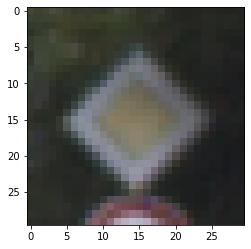

In [70]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00007.png')
print(prediction)
for ind, i in enumerate(prediction):
    print(np.argmax(i), end=" ")
print("Predicted traffic sign is: ", classes[np.argmax(i)])
plt.imshow(plot)
plt.show()